## Unlabelled Images


We are going to display some of the images of the dataset to get a feel
of how this images are.
The first step to achieve this is to import the dataset using the function that we saw in the preprocessing
notebook.
Any exploratory data analysis should explore only the training data,
so that is the dataset we'll import.


In [8]:
from preprocessing import get_train_test_sets

x_train, _, _, y_train, _, _ = get_train_test_sets()

Then we can display the first 16 images.


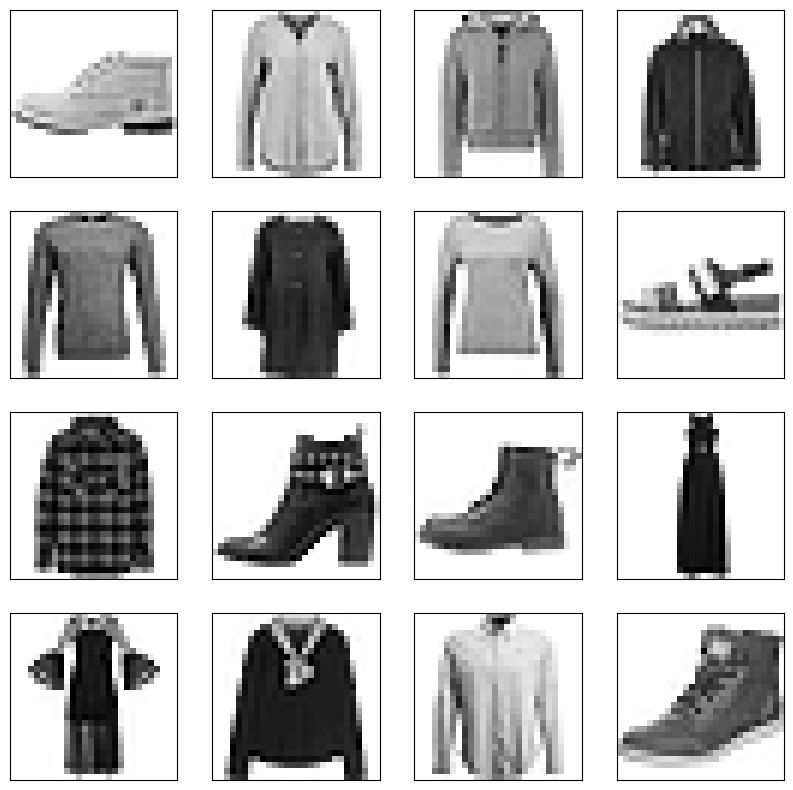

In [9]:
import matplotlib.pyplot as plt
from numpy.random import permutation


plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(permutation(x_train)[i].reshape((28, 28)), cmap=plt.cm.binary)
plt.show()

Just by looking at these first few images we can already get some key insights into the dataset.
The background is plain white, the objects are centered and they appear to be aligned with the frame,
and the contrast is high in most images.
Any human looking a these pictures should be able to classify almost all of them correctly.
These observations indicate that a good model should be able to correctly classify almost all
the images.

There are a few exceptions though.
Personally, I cannot confidently classify the 7th image (2nd row, 3rd column).
Apart from this particularly difficult case, there are a few edge cases that are solvable by
a human but they are not easy at all.
For example the shirt in the top right is only a few pixels away from being a t-shirt,
and it is even possible that I'm wrong and it is just a particularly weird t-shirt.

Therefore, we can say that a human is able to classify most images easily,
but there are some particularly difficult cases which even a human may not be able to solve.
We'll come back to this to get an estimation of the accuracy of a human,
but first we should show the labelled images for reference.


## Labelled Images


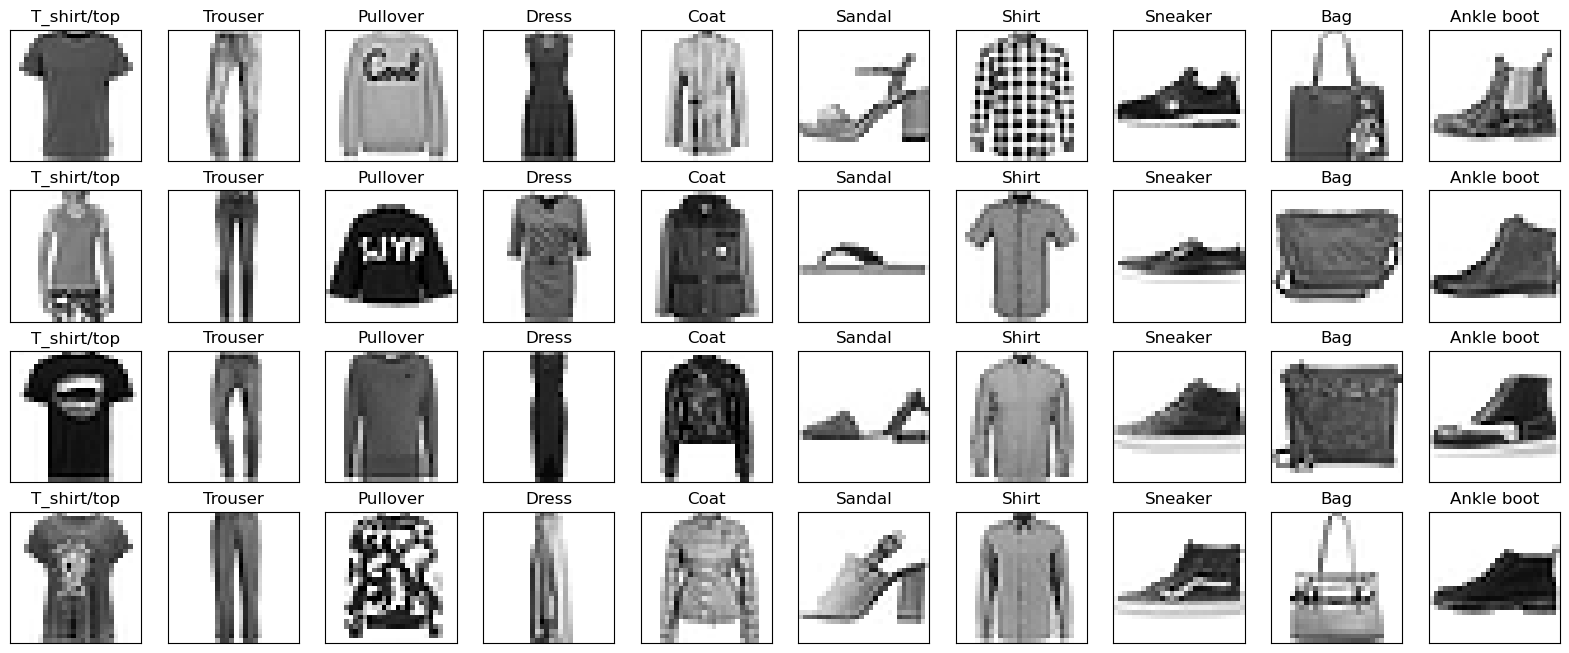

In [10]:
import matplotlib.pyplot as plt
import numpy as np

class_names = [
    "T_shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


plt.figure(figsize=(20, 8))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(
        x_train[y_train == i % 10][i // 10].reshape((28, 28)), cmap=plt.cm.binary
    )
    label_index = int(y_train[y_train == i % 10][i // 10])
    plt.title(class_names[label_index])
plt.show()

## Estimation of human performance


The labelled images seem to confirm our previous observation.
Also, based on this picture we can theorize that the most difficult cases
are going to be edge cases between t-shirts / shirts and among different types of shoes.
On the contrary, bags should be the easiest label to classify.


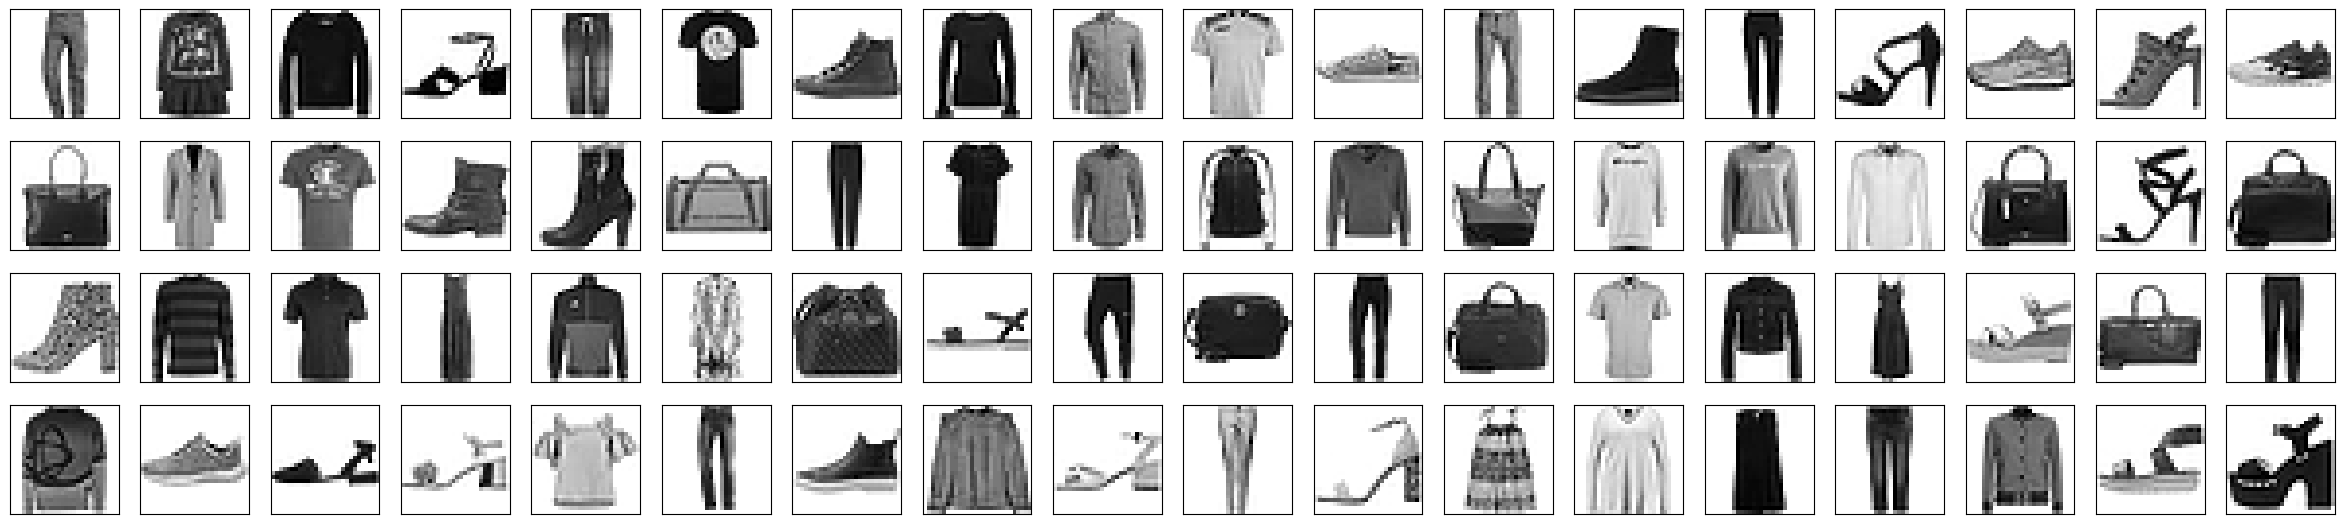

In [11]:
import matplotlib.pyplot as plt
from numpy.random import permutation


plt.figure(figsize=(30, 10))
for i in range(72):
    plt.subplot(6, 18, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(permutation(x_train)[i].reshape((28, 28)), cmap=plt.cm.binary)
plt.show()

We can use the previous image to make a first estimation of human performance in this problem,
although it's good to point out that we should have someone label a significant portion of
the images in the dataset to get a good estimate of human performance.
Anyways, there are 4 images I cannot confidently classify.
Therefore we can estimate human performance to be:


In [12]:
print("human_accuracy: ", round((72 - 4) / 72 * 100, 2), "%")

human_accuracy:  94.44 %


## Class balance


Finally, we want to analyze the distribution of labels, i.e.
how many images are classified into each class, to see if we are dealing with a balanced
or unbalanced problem


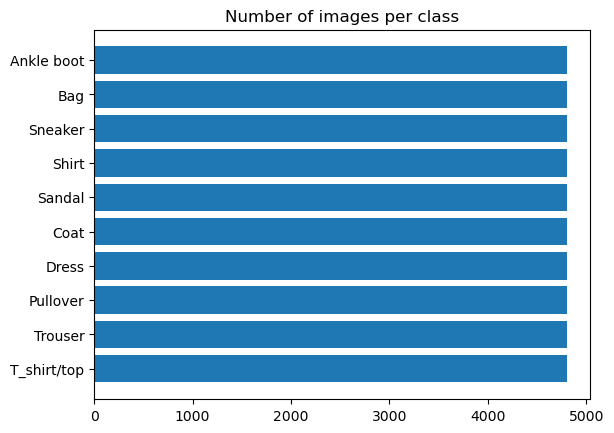

In [13]:
# Get value counts
unique_values, counts = np.unique(y_train, return_counts=True)

# Plot as a bar plot
plt.barh(unique_values, counts)
plt.yticks(range(10), class_names)
plt.title("Number of images per class")
plt.show()

As you can see, it looks like all of the classes have almost the exact same count in the training set.
Because we obtained this set through stratified sampling, we can conclude that this is also
the case for the validation set.
This is the ideal scenario
as ML and DL models work best with balanced classes.


We can get the exact number of images per class to get a more precise view.


In [24]:
import pandas as pd

value_counts = pd.DataFrame({"label": y_train}).value_counts()
value_counts.index = value_counts.index.map(lambda x: class_names[int(x[0])])
value_counts

T_shirt/top    4800
Trouser        4800
Pullover       4800
Dress          4800
Coat           4800
Sandal         4800
Shirt          4800
Sneaker        4800
Bag            4800
Ankle boot     4800
Name: count, dtype: int64

Indeed all of the classes have the exact same value counts.
